Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch: 0001 Avg. cost = 0.0925
Epoch: 0002 Avg. cost = 0.0702
Epoch: 0003 Avg. cost = 0.0621
Epoch: 0004 Avg. cost = 0.0581
Epoch: 0005 Avg. cost = 0.0561
Epoch: 0006 Avg. cost = 0.0548
Epoch: 0

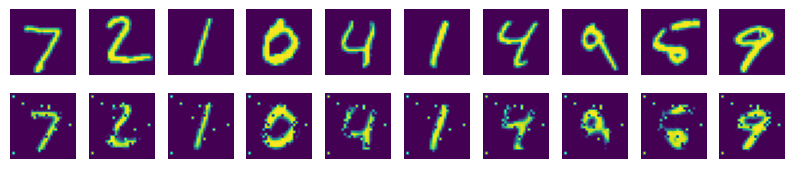

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

# 하이퍼파라메터 설정
learning_rate = 0.01
training_epoch = 100
batch_size = 100
encoder_layer = 256
n_hidden = 128
decoder_layer = 256
n_input = 28 * 28

# 신경망 구성을 위한 플레이스홀더 설정
X = tf.placeholder(tf.float32, [None, n_input])

# 인코더 레이어
W1_encode = tf.Variable(tf.random_normal([n_input, encoder_layer]))
b1_encode = tf.Variable(tf.random_normal([encoder_layer]))

encoder1 = tf.nn.sigmoid(tf.add(tf.matmul(X, W1_encode), b1_encode))

W2_encode = tf.Variable(tf.random_normal([encoder_layer, n_hidden]))
b2_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder1, W2_encode), b2_encode))

# 디코더 레이어
W1_decode = tf.Variable(tf.random_normal([n_hidden, decoder_layer]))
b1_decode = tf.Variable(tf.random_normal([decoder_layer]))
decoder1 = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W1_decode), b1_decode))

W2_decode = tf.Variable(tf.random_normal([decoder_layer, n_input]))
b2_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(decoder1, W2_decode), b2_decode))

# 손실 함수 및 최적화 함수 설정
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# 학습 진행
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        total_cost += cost_val
    
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))
    

print('최적화 완료!')

# 10개의 테스트 데이터 출력값 생성 by 디코더
sample_size = 10
samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})

# 이미지로 출력
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))
    
plt.show()